In [3]:
pip install pydotplus

     |████████████████████████████████| 278 kB 602 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=b1a817e67f4ee5071feee44ed89220c1eeac6a552219cf9c1ef2af5aa76213d3
  Stored in directory: /Users/khai/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [5]:
df = pd.read_csv("/Users/khai/Downloads/shows.csv")
d = {'UK': 0,'USA': 1,'N': 2} 
df['Nationality'] = df['Nationality'].map(d) 
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [6]:
features = ['Age','Experience','Rank','Nationality']
X = df[features]
y = df['Go']
dtree = DecisionTreeClassifier()
dtree.fit(X, y)

DecisionTreeClassifier()

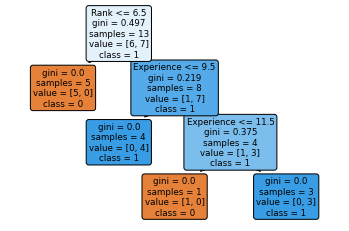

In [8]:
from sklearn.tree import plot_tree
plot_tree(dtree, 
          feature_names = features, 
          class_names = ['0','1'], 
          filled = True, 
          rounded = True)
plt.show()

1. Run the program with a set of data records and submit the output?

In [18]:
if dtree.predict([[40, 10, 6, 1]])==[0]:
    print('GO')
else:
    print('NO')

GO


2. Apply the program with another dataset? Split the dataset to the training and testing subsets following the 7:3 ratio, train and test the classifier, and submit precision and error.

In [33]:
bill_authentication=pd.read_csv('/Users/khai/Downloads/bill_authentication.csv')
bill_authentication.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [36]:
X=bill_authentication.drop('Class',axis=1)
y=bill_authentication[['Class']]

In [37]:
#Split the dataset into train/test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [38]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [39]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix,precision_score, recall_score

In [40]:
#Evaluate the result
decision_pred=decision_tree.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, decision_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(y_test,decision_pred)
score2 = precision_score(y_test,decision_pred)
score3= recall_score(y_test,decision_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[225   4]
 [  1 182]]


Accuracy is  98.79 %
Precision is  0.98
Recall is  0.99
